In [1]:
import kaggle

kaggle.api.authenticate()  # store your kaggle.json file in ~/.kaggle/kaggle.json
kaggle.api.dataset_download_files("datasnaek/youtube-new", path="dataset", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/datasnaek/youtube-new


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
df.iloc[1]["tags"]

'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"'

In [152]:
import json

df["publish_time"] = pd.to_datetime(df["publish_time"]).dt.tz_convert("US/Pacific")
df["trending_date"] = pd.to_datetime(
    df["trending_date"], format="%y.%d.%m", utc=True
).dt.tz_convert("US/Pacific")
df["likes"] = df.apply(lambda row: row["likes"] if row["likes"] > 0 else 1, axis=1)
df["dislikes"] = df.apply(
    lambda row: row["dislikes"] if row["dislikes"] > 0 else 1, axis=1
)
df["likes_dislikes_ratio"] = df["likes"] / df["dislikes"]

with open("dataset/US_category_id.json") as f:
    data = json.load(f)
    categories = {int(item["id"]): item["snippet"]["title"] for item in data["items"]}

df["category"] = df["category_id"].map(categories)

In [153]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.000000,17.000000,24.000000,2.500000e+01,4.300000e+01
views,40949.0,2.360785e+06,7.394114e+06,549.000000,242329.000000,681861.000000,1.823157e+06,2.252119e+08
likes,40949.0,7.426671e+04,2.288853e+05,1.000000,5424.000000,18091.000000,5.541700e+04,5.613827e+06
dislikes,40949.0,3.711410e+03,2.902970e+04,1.000000,202.000000,631.000000,1.938000e+03,1.674420e+06
comment_count,40949.0,8.446804e+03,3.743049e+04,0.000000,614.000000,1856.000000,5.755000e+03,1.361580e+06
likes_dislikes_ratio,40949.0,4.367374e+01,5.129488e+01,0.041583,13.054664,28.909091,5.608326e+01,1.737333e+03
tag_count,40949.0,1.973633e+01,1.201255e+01,1.000000,10.000000,19.000000,2.900000e+01,6.900000e+01


Text(0.5, 1.0, 'Likes/Dislikes Ratio Distribution')

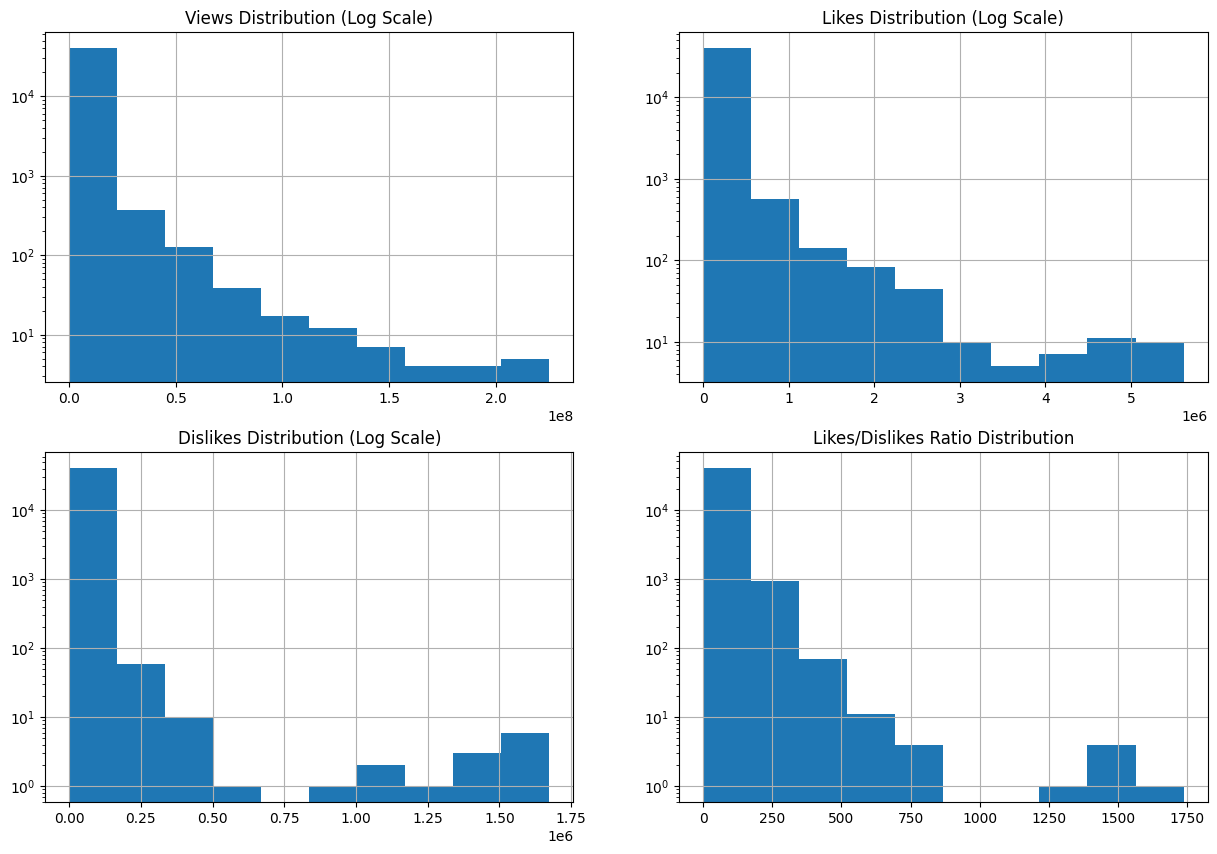

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df["views"].hist(log=True)
plt.title("Views Distribution (Log Scale)")

plt.subplot(2, 2, 2)
df["likes"].hist(log=True)
plt.title("Likes Distribution (Log Scale)")

plt.subplot(2, 2, 3)
df["dislikes"].hist(log=True)
plt.title("Dislikes Distribution (Log Scale)")

plt.subplot(2, 2, 4)
df["likes_dislikes_ratio"].hist(log=True)
plt.title("Likes/Dislikes Ratio Distribution")

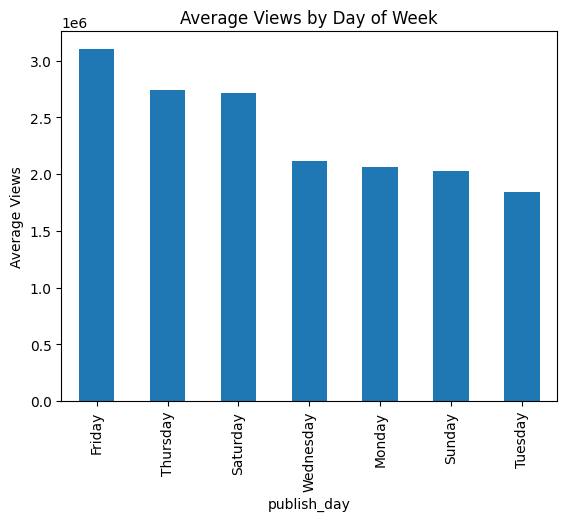

In [175]:
# Day of week popularity
df["publish_day"] = df["publish_time"].dt.day_name()
day_views = df.groupby("publish_day")["views"].mean().sort_values(ascending=False)

day_views.plot(kind="bar")
plt.title("Average Views by Day of Week")
plt.ylabel("Average Views")
plt.show()

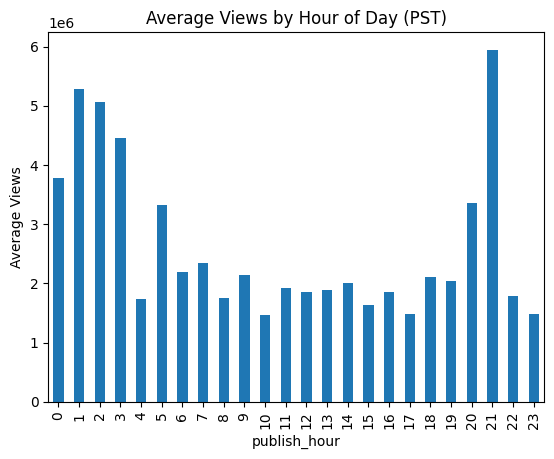

In [128]:
# Hourly trending patterns
df["publish_hour"] = df["publish_time"].dt.hour
hourly_views = df.groupby("publish_hour")["views"].mean()

hourly_views.plot(kind="bar")
plt.title("Average Views by Hour of Day (PST)")
plt.ylabel("Average Views")
plt.show()

In [129]:
# Time between publish and first trending
earliest_videos = df.loc[df.groupby("video_id")["trending_date"].idxmin()]
earliest_videos["days_to_trending"] = (
    earliest_videos["trending_date"] - earliest_videos["publish_time"]
).dt.days
earliest_videos["days_to_trending"].describe()

count    6351.000000
mean       21.521650
std       209.963237
min        -1.000000
25%         0.000000
50%         1.000000
75%         2.000000
max      4214.000000
Name: days_to_trending, dtype: float64

Text(0.5, 1.0, 'Average Views by Day and Hour')

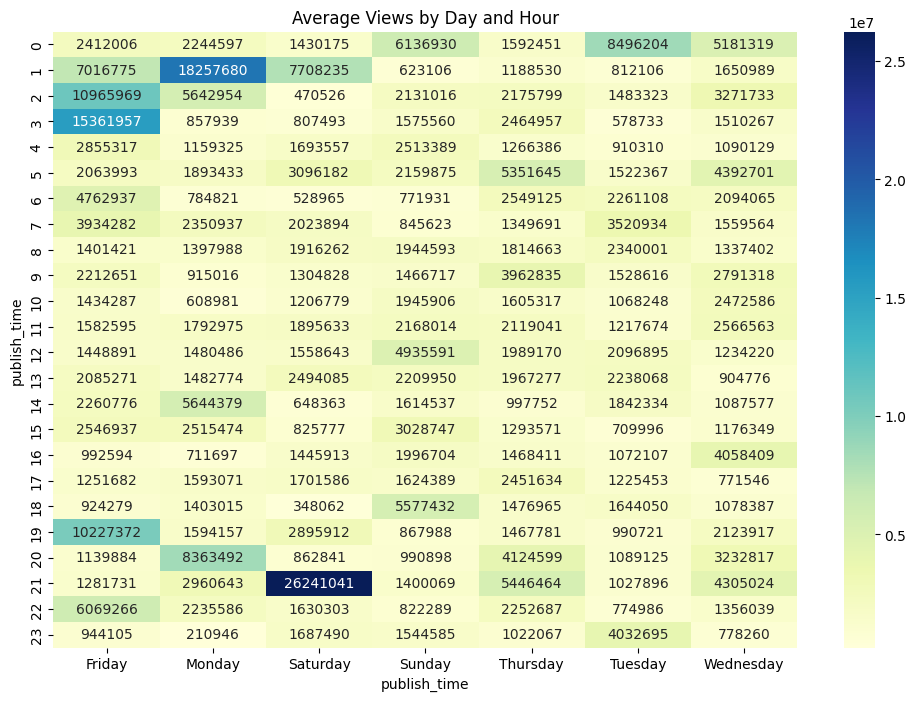

In [145]:
import seaborn as sns

views_heatmap = df.pivot_table(
    values="views",
    index=df["publish_time"].dt.hour,
    columns=df["publish_time"].dt.day_name(),
    aggfunc="mean",
)

plt.figure(figsize=(12, 8))
sns.heatmap(views_heatmap, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Average Views by Day and Hour")

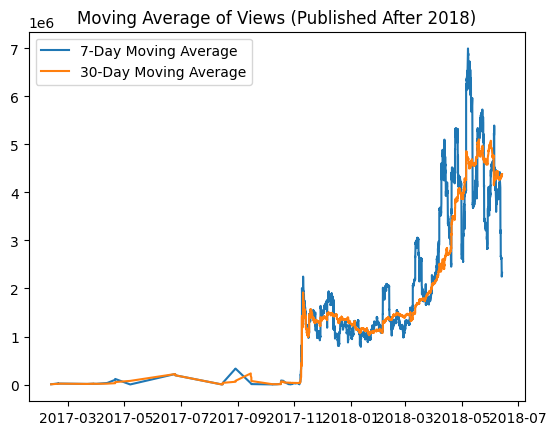

In [131]:
df_publish = df.set_index("publish_time")
df_publish.sort_index(inplace=True)
# Filter videos published in 2018 or later
df_publish_filtered = df_publish[df_publish.index.year >= 2017]

# 7-day and 30-day rolling average of views
rolling_7_day = df_publish_filtered["views"].rolling(window="7D").mean()
rolling_30_day = df_publish_filtered["views"].rolling(window="30D").mean()

plt.plot(rolling_7_day, label="7-Day Moving Average")
plt.plot(rolling_30_day, label="30-Day Moving Average")
plt.title("Moving Average of Views (Published After 2018)")
plt.legend()
plt.show()

In [ ]:
"""
Notes:
- Consider recommending similar videos? But no way to validate this. Industry uses A/B testing on metrics
such as click-through rate (CTR) and watch time.
- Predict optimal time to publish videos based on category?
- Predict likes vs dislikes based on category, tags, etc.
"""

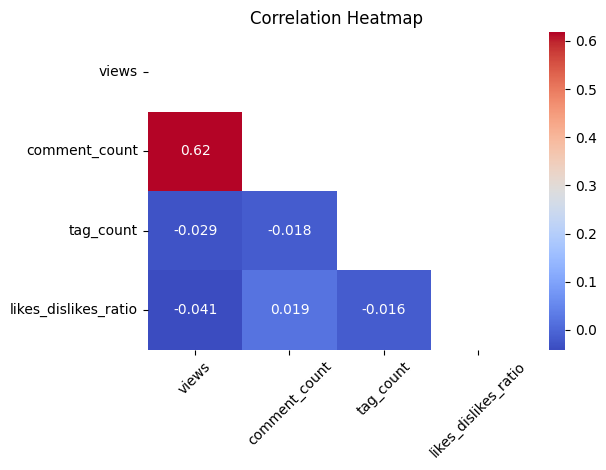

In [ ]:
df["tag_count"] = df["tags"].apply(lambda x: len(str(x).split("|")))
numeric_features = ["views", "comment_count", "tag_count"]
corr = df[numeric_features + ["likes_dislikes_ratio"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", mask=np.triu(corr))
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Conclusion: No strong correlation between views, comment count, tag count, and likes/dislikes ratio

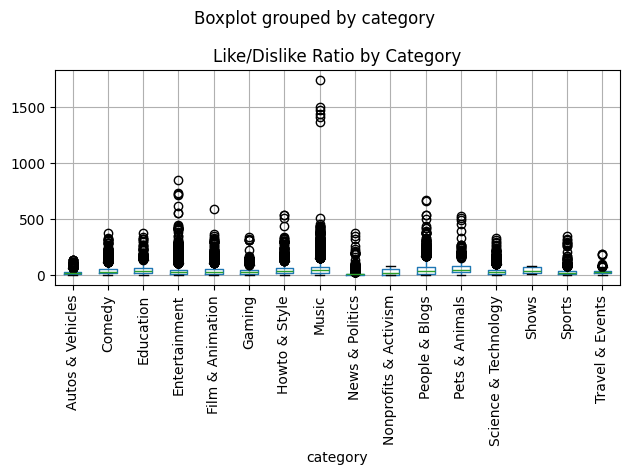

In [109]:
df.boxplot(column="likes_dislikes_ratio", by="category")
plt.title("Like/Dislike Ratio by Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Conclusion: Categories influence likes/dislikes ratio

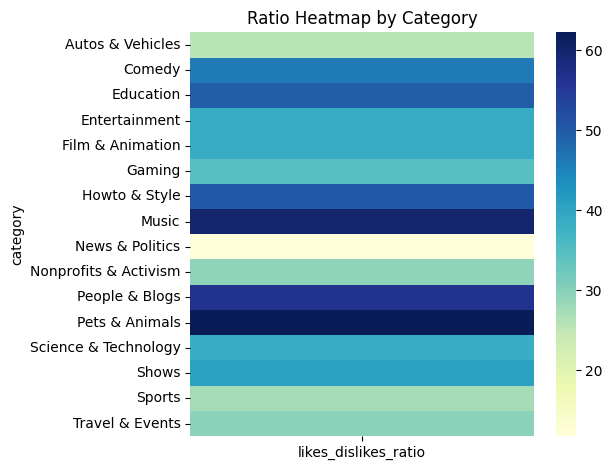

In [ ]:
sns.heatmap(
    df.pivot_table(values="likes_dislikes_ratio", index="category", aggfunc="mean"),
    cmap="YlGnBu",
)
plt.title("Ratio Heatmap by Category")

plt.tight_layout()
plt.show()

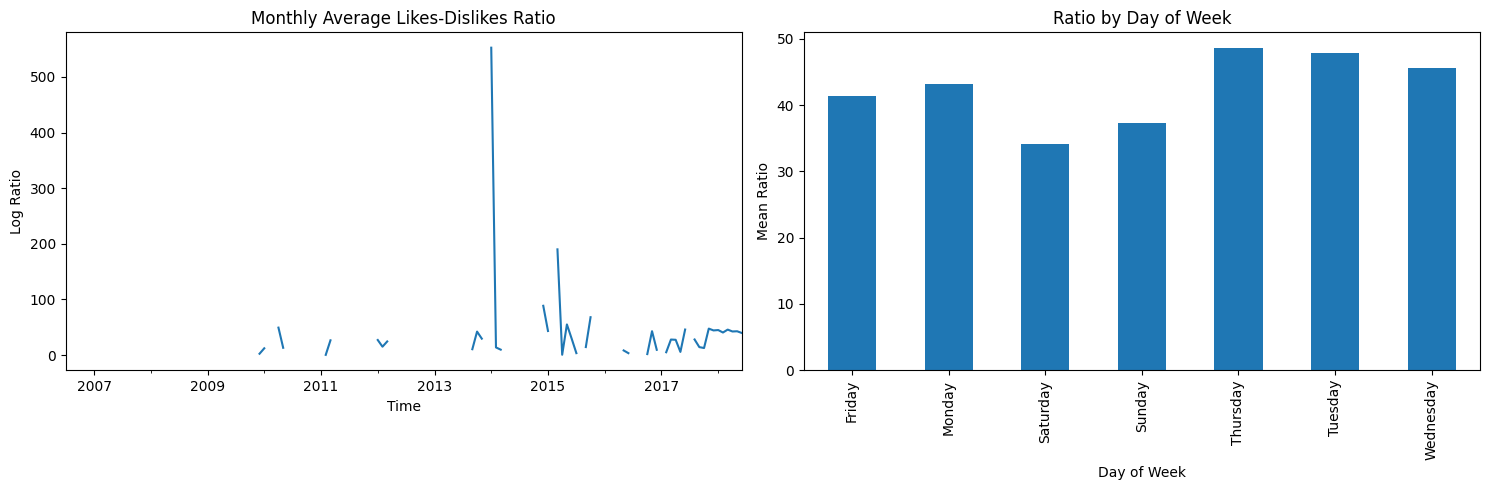

In [178]:
monthly_ratio = df_publish.resample("MS")["likes_dislikes_ratio"].mean()

plt.figure(figsize=(15, 5))

# Monthly trend
plt.subplot(121)
monthly_ratio.plot()
plt.title("Monthly Average Likes-Dislikes Ratio")
plt.xlabel("Time")
plt.ylabel("Log Ratio")

# Day of week analysis
plt.subplot(122)
df.groupby("publish_day")["likes_dislikes_ratio"].mean().plot(kind="bar")
plt.title("Ratio by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Mean Ratio")
plt.tight_layout()
plt.show()